In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import Normalize
from scipy.interpolate import griddata

                 SNR      Blur  Contrast  Brightness   Brisque
SNR         1.000000  0.111842  0.064903    0.338188 -0.606858
Blur        0.111842  1.000000 -0.038357    0.172200 -0.072340
Contrast    0.064903 -0.038357  1.000000   -0.714696 -0.097839
Brightness  0.338188  0.172200 -0.714696    1.000000 -0.230695
Brisque    -0.606858 -0.072340 -0.097839   -0.230695  1.000000


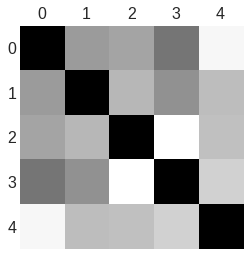

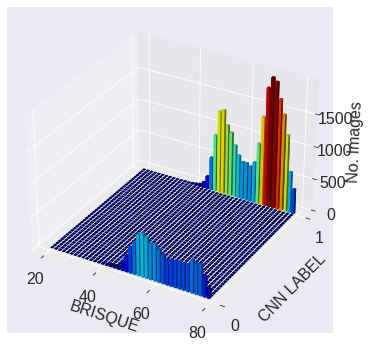

In [14]:
path = '../../../csv/kaggle_total.csv'
csv1 = pd.read_csv(path)
csv1 = csv1.sample(frac=1).reset_index(drop=True)
SNR = csv1['SNR'].to_numpy()
BLUR = csv1['Blur'].to_numpy()
CONTRAST = csv1['Contrast'].to_numpy()
BRISQUE = csv1['Brisque'].to_numpy()
BRIGHT = csv1['Brightness'].to_numpy()
LABEL = csv1['Qlabel'].to_numpy()
DR = csv1['DR'].to_numpy()

df = pd.DataFrame({
    'SNR': csv1['SNR'],
    'Blur': csv1['Blur'],
    'Contrast': csv1['Contrast'],
    'Brightness': csv1['Brightness'],
    'Brisque': csv1['Brisque'],
})

print(df.corr())

corr = df.corr()
plt.matshow(df.corr())
plt.show()
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(BRISQUE, LABEL, bins=(40, 40), range=[[20, 80], [0, 1]])
# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = np.ones_like(zpos)
dy = 0.02 * np.ones_like(zpos)
dz = hist.ravel()
norm = Normalize()
colors = cm.jet(norm(dz*0.1))
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
ax.set_xlabel('BRISQUE')
ax.set_ylabel('CNN LABEL')
ax.set_zlabel('No. Images')
ax.set_yticks([0, 1])
plt.show()

(3, 33184)
(3, 33184)
[[ 1.24000793 12.14598773 71.9302673 ]
 [ 1.52556064 18.04384593 54.48280944]]
13566
19618


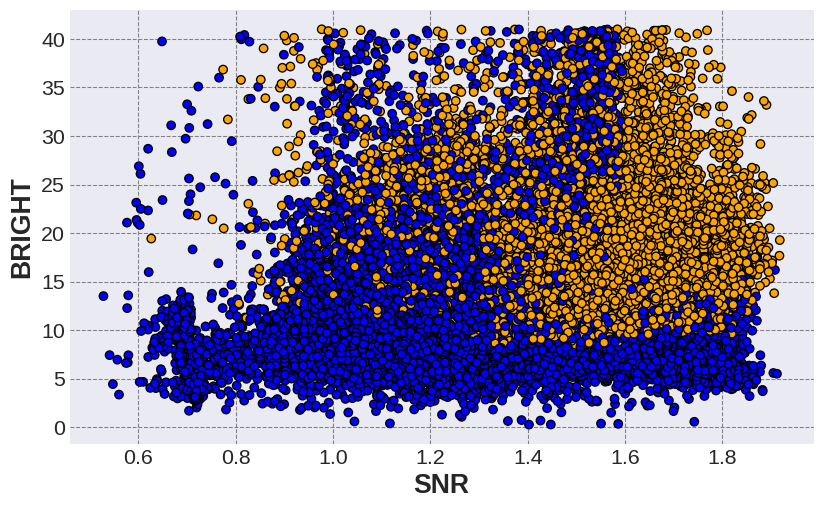

In [17]:
def plot_2D(X, Y, labelx, labely, name):
    colores = ['blue', 'orange', 'green']
    asignar = []
    for row in labels_kmeans:
        asignar.append(colores[row])
    size = 40
    fig = plt.figure()
    plt.style.use('seaborn-dark')
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig.set_dpi(96)
    plt.grid(color='gray', linestyle='--', linewidth=0.8)
    plt.scatter(X, Y, c=asignar, s=size, edgecolor='black')
    plt.xlabel(labelx, fontweight="bold", fontsize=20)
    plt.ylabel(labely, fontweight="bold", fontsize=20)
    plt.savefig(name + '.png')

from sklearn.cluster import KMeans
import matplotlib
path = '../../../csv/kaggle_new_reduced.csv'
csv1 = pd.read_csv(path)
csv1 = csv1.sample(frac=1).reset_index(drop=True)
SNR = csv1['SNR'].to_numpy()
BLUR = csv1['Blur'].to_numpy()
CONTRAST = csv1['Contrast'].to_numpy()
BRISQUE = csv1['Brisque'].to_numpy()
BRIGHT = csv1['Brightness'].to_numpy()
LABEL = csv1['Qlabel'].to_numpy()
LABEL1 = csv1['Qlabel2'].to_numpy()
DR = csv1['DR'].to_numpy()

# asd = np.array([assedd, y, z, c, b, l])
# asd = np.array([SNR, BLUR, CONTRAST])
asd = np.array([SNR, BLUR, BRISQUE])
print(asd.shape)

data = asd.transpose((1,0))
print(asd.shape)
kmeans = KMeans(n_clusters=2).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)
labels_kmeans = kmeans.predict(data)
output_kmeans = labels_kmeans.tolist()
# Getting the cluster centers
Cluster = kmeans.cluster_centers_
matplotlib.rcParams.update({'font.size': 16})
labelds = np.sum(labels_kmeans == 1)
print(labelds)
labelds = np.sum(labels_kmeans == 0)
print(labelds)
# plot_2D(data[:, 0], data[:, 1], 'SNR', 'BLUR', 'SNRvsBLUR')
# plot_2D(data[:, 0], data[:, 2], 'SNR', 'CONTRAST', 'SNRvsCONTRAST')
# plot_2D(data[:, 1], data[:, 2], 'BLUR', 'CONTRAST', 'BLURvsCONTRAST')

plot_2D(data[:, 0], data[:, 1], 'SNR', 'BRIGHT', 'SNRvsBRIGHT')
# plot_2D(data[:, 0], data[:, 2], 'SNR', 'BRIGHT', 'BRIGHTvsBRISQUE')
# plot_2D(data[:, 1], data[:, 2], 'BRIGHT', 'BRISQUE', 'BRIGHTvsBRISQUE')



In [16]:
from sklearn.metrics import cohen_kappa_score as kappa

l2 = labels_kmeans
covariance = np.cov(data[:, 0])
print(covariance)
kap = np.sum(labels_kmeans == LABEL[:2000]) / labels_kmeans.shape[0]
print(kap)
print(kappa(labels_kmeans, LABEL[:2000]))


0.06631259348437009
0.0


/home/alonso/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


ValueError: Found input variables with inconsistent numbers of samples: [33184, 2000]

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3, **kwargs):

    """
    Create a plot of the covariation confidence ellipse op `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data

    Returns
    -------
    float: the Pearson Correlation Coefficient for `x` and `y`.

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties

    author : Carsten Schelp
    license: GNU General Public License v3.0 (https://github.com/CarstenSchelp/CarstenSchelp.github.io/blob/master/LICENSE)
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1,1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, **kwargs)

    # calculating the stdandarddeviation of x from  the squareroot of the variance
    # np.sqrt(cov[0, 0])
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the stdandarddeviation of y from  the squareroot of the variance
    # np.sqrt(cov[1, 1])
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
        
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
        
    return pearson  

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# for i in labels_kmeans[:100]:
#     plt.scatter(data[labels_kmeans == i , 0] , data[labels_kmeans == i , 1] , label = i, s=0.5)

pearson = confidence_ellipse(data[:, 0],data[:, 1], ax, facecolor='none', edgecolor='blue')
ax.scatter(data[:, 0],data[:, 1], s=0.5, c=asignar)
# pearson = confidence_ellipse(data[:, 0],data[:, 3], ax, facecolor='none', edgecolor='orange')
# ax.scatter(data[:, 0],data[:, 3], s=0.5)

plt.show()

0.6792128736740598


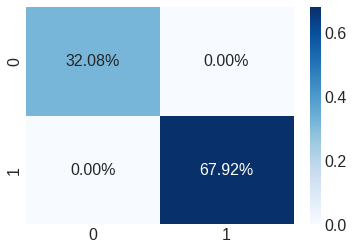

33184 33184


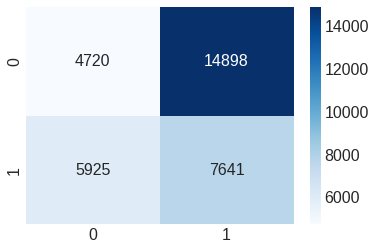

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(np.sum(LABEL1 == 1) / (np.sum(LABEL1 == 1)+np.sum(LABEL1 == 0)))
cf_matrix = confusion_matrix(LABEL1, LABEL1)
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.2%')
plt.show()
print(len(labels_kmeans), len(LABEL1))
cf_matrix = confusion_matrix(labels_kmeans, LABEL1)
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()
